# Aula 5 - LabHackerCD


# Análise de medicamentos do covid

# Arquivo: csv

# Exemplo 1


In [1]:
# importando o pandas
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# carregando o arquivo de dados, o enconding utf-8 não é o do arquivo, pois o arquivo era excel foi passado para csv.
df = pd.read_csv("DistribuicaoCloroquinaOseltamivir.csv", sep=";", encoding="cp1252")  

In [10]:
# visualizando o numero de linhas, colunas
df.shape

(986, 10)

In [11]:
df.head()

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,QUANTIDADE,DATA DE SOLICITAÇÃO,STATUS,DATA DE ENTREGA
0,NORTE,ACRE,SAÚDE INDÍGENA,DSEI ALTO RIO JURUÁ,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,1.5,NaN,ENTREGA REALIZADA,20/04/2020
1,NORTE,ACRE,SES,ACRE,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,60.0,NaN,ENTREGA REALIZADA,03/04/2020
2,NORTE,ACRE,SAÚDE INDÍGENA,DSEI ALTO RIO PURUS,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,5.0,NaN,ENTREGA REALIZADA,06/04/2020
3,NORTE,ACRE,SES,ACRE,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,57.5,02/06/2020,ENTREGA REALIZADA,15/06/2020
4,NORTE,ACRE,SES,ACRE,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,27.0,03/06/2020,ENTREGA REALIZADA,15/06/2020


In [12]:
# visualizar as 5 ultimas linhas
df.tail()

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,QUANTIDADE,DATA DE SOLICITAÇÃO,STATUS,DATA DE ENTREGA
981,SUDESTE,MINAS GERAIS,SMS,Virginia,HIDROXICLOROQUINA 200MG,COVID-19,1.5,NaN,ENTREGA REALIZADA,29/12/2020
982,SUDESTE,MINAS GERAIS,SMS,Fervedouro,HIDROXICLOROQUINA 200MG,COVID-19,1.5,NaN,ENTREGA REALIZADA,30/12/2020
983,SUDESTE,MINAS GERAIS,SMS,Santa Luzia,HIDROXICLOROQUINA 200MG,COVID-19,1.5,NaN,ENTREGA REALIZADA,29/12/2020
984,SUDESTE,MINAS GERAIS,SMS,Nova Lima,HIDROXICLOROQUINA 200MG,COVID-19,1.5,NaN,ENTREGA REALIZADA,29/12/2020
985,SUDESTE,MINAS GERAIS,SMS,Belo Horizonte,HIDROXICLOROQUINA 200MG,COVID-19,6.0,NaN,ENTREGA REALIZADA,29/12/2020


In [13]:
# visualizar os tipos dos dados e as quantidades
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   REGIÃO               986 non-null    object 
 1   UF                   986 non-null    object 
 2   DESTINATARIO         986 non-null    object 
 3   LOCALIDADE           986 non-null    object 
 4   ITEM                 986 non-null    object 
 5   PROGRAMA DE SAÚDE    986 non-null    object 
 6   QUANTIDADE           985 non-null    float64
 7   DATA DE SOLICITAÇÃO  40 non-null     object 
 8   STATUS               986 non-null    object 
 9   DATA DE ENTREGA      978 non-null    object 
dtypes: float64(1), object(9)
memory usage: 77.2+ KB


In [14]:
# Relembrando: podemos pegar os dados de uma única coluna
# observação: quando usa o colchetes está cortando (slices)
df["REGIÃO"]

0        NORTE
1        NORTE
2        NORTE
3        NORTE
4        NORTE
        ...   
981    SUDESTE
982    SUDESTE
983    SUDESTE
984    SUDESTE
985    SUDESTE
Name: REGIÃO, Length: 986, dtype: object

In [16]:
# Vamos fazer uma análise inicial dos dados
df["REGIÃO"].value_counts()


NORTE           274
NORDESTE        265
CENTRO-OESTE    168
SUDESTE         129
SUL              95
SUL              34
NORTE            17
NORDESTE          3
SUDESTE           1
Name: REGIÃO, dtype: int64

In [17]:
# Nós vamos usar uma função do pandas para limpar os espaços em branco do nome da região
df["REGIÃO"] = df["REGIÃO"].str.strip()

In [18]:
# Vamos fazer uma análise inicial dos dados
df["REGIÃO"].value_counts()

NORTE           291
NORDESTE        268
CENTRO-OESTE    168
SUDESTE         130
SUL             129
Name: REGIÃO, dtype: int64

In [19]:
# Qual a quantidde de distribuição de medicamentos por UF?
df["UF"]. value_counts()

MATO GROSSO             75
AMAZONAS                52
PARÁ                    52
RIO GRANDE DO SUL       47
MINAS GERAIS            47
RORAIMA                 44
ACRE                    43
RONDÔNIA                42
CEARÁ                   41
SANTA CATARINA          36
GOIÁS                   35
PARANÁ                  32
BAHIA                   32
SÃO PAULO               31
PIAUÍ                   28
PARAÍBA                 27
ESPÍRITO SANTO          27
PERNAMBUCO              25
RIO GRANDE DO NORTE     24
AMAPÁ                   24
DISTRITO FEDERAL        22
SERGIPE                 22
MARANHÃO                22
TOCANTINS               21
RIO DE JANEIRO          20
MATO GROSSO DO SUL      19
MATO GROSSO DO SUL      17
ALAGOAS                 15
ALAGOAS                 13
BAHIA                   11
SANTA CATARINA           8
PARANÁ                   6
RORAIMA                  5
RIO DE JANEIRO           4
PARÁ                     4
RIO GRANDE DO NORTE      4
ACRE                     3
M

In [20]:
# Vamos tentar normalizar o dataframe inteiro
df = df.str.strip()

AttributeError: 'DataFrame' object has no attribute 'str'

In [21]:
# Vamos fazer um codigo para tratar esses dados

# Um loop
for col in df.columns:
    df[col] = df[col].str.strip()

AttributeError: Can only use .str accessor with string values!

In [22]:
# O pandas nos permite selecionar as colunas por tipo
df.select_dtypes("object").head()

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,DATA DE SOLICITAÇÃO,STATUS,DATA DE ENTREGA
0,NORTE,ACRE,SAÚDE INDÍGENA,DSEI ALTO RIO JURUÁ,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,NaN,ENTREGA REALIZADA,20/04/2020
1,NORTE,ACRE,SES,ACRE,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,NaN,ENTREGA REALIZADA,03/04/2020
2,NORTE,ACRE,SAÚDE INDÍGENA,DSEI ALTO RIO PURUS,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,NaN,ENTREGA REALIZADA,06/04/2020
3,NORTE,ACRE,SES,ACRE,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,02/06/2020,ENTREGA REALIZADA,15/06/2020
4,NORTE,ACRE,SES,ACRE,DIFOSFATO DE CLOROQUINA 150MG,MALÁRIA,03/06/2020,ENTREGA REALIZADA,15/06/2020


In [23]:
# Vamos pegar o nome das colunas por tipo 
df.select_dtypes("object").columns

Index(['REGIÃO', 'UF', 'DESTINATARIO', 'LOCALIDADE', 'ITEM',
       'PROGRAMA DE SAÚDE', 'DATA DE SOLICITAÇÃO', 'STATUS',
       'DATA DE ENTREGA'],
      dtype='object')

In [25]:
# Vamos refazer nosso código para tratar esses dados

# Um loop
for col in df.select_dtypes("object").columns:
    df[col] = df[col].str.strip()

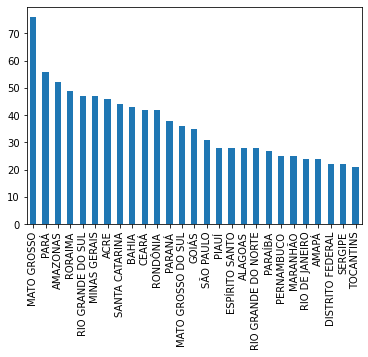

In [26]:
# Vamos fazer um gráfico com essses dados
df["UF"].value_counts().plot.bar()

In [27]:
# Vamos fazer recortes nos dados de acordo com critérios
df[df["PROGRAMA DE SAÚDE"] == "COVID-19"]["UF"].value_counts()

MATO GROSSO            33
RIO GRANDE DO SUL      29
SANTA CATARINA         16
MINAS GERAIS           16
RORAIMA                14
GOIÁS                  12
BAHIA                  10
PARANÁ                  9
MATO GROSSO DO SUL      7
ALAGOAS                 7
ESPÍRITO SANTO          7
SÃO PAULO               6
PARÁ                    6
RONDÔNIA                6
ACRE                    6
RIO GRANDE DO NORTE     6
PARAÍBA                 5
PIAUÍ                   5
MARANHÃO                5
AMAZONAS                5
TOCANTINS               5
RIO DE JANEIRO          5
AMAPÁ                   4
PERNAMBUCO              4
DISTRITO FEDERAL        4
CEARÁ                   4
SERGIPE                 3
Name: UF, dtype: int64

In [28]:
# Qual a distribuiçao de mediccamentos está com quantidades zeraas
df[df["QUANTIDADE"].isnull()]

,REGIÃO,UF,DESTINATARIO,LOCALIDADE,ITEM,PROGRAMA DE SAÚDE,QUANTIDADE,DATA DE SOLICITAÇÃO,STATUS,DATA DE ENTREGA
832,NORDESTE,PIAUÍ,SMS,TERESINA,FOSFATO DE OSELTAMIVIR 45MG,INFLUENZA,NaN,NaN,ENTREGA REALIZADA,14/09/2020
